# Project Phase 2/3
## Joseph Princiotta & Justin Lusk

#### Below is relevant code from Phase 0/1. This must be executed for the remaning code to compile properly.

In [1]:
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler


dfTest = pd.read_csv("Phishing_Legitimate_test_student.csv", na_values=['',' ','n/a'])
dfTrain = pd.read_csv("Phishing_Legitimate_train_missing_data.csv", na_values=['',' ','n/a'])
################################# Phase 0 and 1 ####################################################
trainRowsWithNa = dfTrain[ dfTrain.isnull().any(axis=1) ]
rowsToDrop = dfTrain[ dfTrain.isnull().sum(axis=1) > 1 ].index
dfTrain.drop(rowsToDrop, inplace=True)
imputer = KNNImputer(n_neighbors=10)
dfTrain2 = pd.DataFrame(imputer.fit_transform(dfTrain),columns = dfTrain.columns)
rows_to_drop=dfTrain2[dfTrain2['UrlLength']>500].index
dfTrain2.drop(rows_to_drop,inplace=True)
rows_to_drop=dfTrain2[dfTrain2['NumNumericChars']>100].index
dfTrain2.drop(rows_to_drop,inplace=True)
rows_to_drop=dfTrain2[dfTrain2['NumDash']>20].index
dfTrain2.drop(rows_to_drop,inplace=True)
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname',
          'NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
clf= LocalOutlierFactor(n_neighbors=20)
X=dfTrain2Numerical.to_numpy()
outlier_label=clf.fit_predict(X)
rows_to_drop= dfTrain2.iloc[clf.negative_outlier_factor_ < -1.30].index
dfTrain2.drop(rows_to_drop,inplace=True)
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname','NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
X = dfTrain2Numerical.to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
dfTrain2Numerical.is_copy = False
dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','UrlLength_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X


/var/folders/cq/tmk5jkmj52n5ypppl89ym8xm0000gn/T/ipykernel_1765/3322510146.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','UrlLength_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X
/var/folders/cq/tmk5jkmj52n5ypppl89ym8xm0000gn/T/ipykernel_1765/3322510146.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

## Begin Phase 2/3 

### First must combine standardized numerical features & binary features into single dataframe from Phase 1.

In [2]:
dfTrain2Numerical= dfTrain2Numerical[['UrlLength_Standardized','NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]

# Next, must combine dfTrain2Numerical with binary data still in dfTrain2

dfTrain3= dfTrain2Numerical.join(dfTrain2[['AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','HttpsInHostname','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']])
dfClass_labels = pd.DataFrame(dfTrain2['CLASS_LABEL'])
dfTrainV2 = dfTrain3.join(dfClass_labels)


# Should drop 'HttpsInHostname' as each case = 0. Will mess up correlation otherwise
dfTrain3=dfTrain3.drop('HttpsInHostname',axis=1)

# Final Cleaned & Standardized training dataframe is 'dfTrain3'.
print(dfTrain3.shape)

(4643, 35)


### Identify features that are highly correlated. This will ensure they are not used in the same model.

Perform standard feature correlation. This calculates how correlated each feature is with every other feature in the dataframe. A correlation score of 1 = perfectly correlated. A score of -1 = negative correlation.

In [3]:
dfTrain3corr=dfTrain3.corr()
dfClass_labels = pd.DataFrame(dfTrain2['CLASS_LABEL'])
dfTrainV2 = dfTrain3.join(dfClass_labels)
print(dfTrain3corr)

                                 UrlLength_Standardized  \
UrlLength_Standardized                         1.000000   
NumNumericChars_Standardized                   0.655773   
NumDots_Standardized                           0.282476   
SubdomainLevel_Standardized                    0.050452   
PathLevel_Standardized                         0.394372   
NumDash_Standardized                           0.433989   
NumDashInHostname_Standardized                 0.105506   
NumUnderscore_Standardized                     0.356616   
NumPercent_Standardized                        0.199024   
NumQueryComponents_Standardized                0.486345   
NumAmpersand_Standardized                      0.491360   
NumHash_Standardized                           0.282692   
HostnameLength_Standardized                    0.131768   
PathLength_Standardized                        0.630952   
QueryLength_Standardized                       0.654758   
NumSensitiveWords_Standardized                 0.197350 

1.'UrlLength_Standardized' has a relation to 'NumNumericChars_Standardized' at .65

2.'NumAmpersand_Standardized' has a strong relation to 'NumQueryComponents_Standardized' at .87

3.'DomainInSubdomains' has a strong relation to 'RightClickDisabled' at .54

Perform Manhattan distance measure among all cases. This will show how far each case is from one another. Manhattan is used becuase Euclidiean is not recomended for multiple features. 

In [4]:
from sklearn.metrics.pairwise import manhattan_distances
distallpairs = manhattan_distances(dfTrain3.iloc[0:35],dfTrain3[0:35])
print("Manhattan distance among all cases:\n", distallpairs)

Manhattan distance among all cases:
 [[ 0.         12.52631343 15.2595317  ... 15.1820271  12.67088316
  20.14320362]
 [12.52631343  0.         14.0606865  ... 11.8048454  13.18962339
  20.80294978]
 [15.2595317  14.0606865   0.         ...  5.63678111  8.46006292
  13.25110136]
 ...
 [15.1820271  11.8048454   5.63678111 ...  0.          8.79681442
  14.22892198]
 [12.67088316 13.18962339  8.46006292 ...  8.79681442  0.
  17.04932379]
 [20.14320362 20.80294978 13.25110136 ... 14.22892198 17.04932379
   0.        ]]


### Investigate Relationship between the target and features

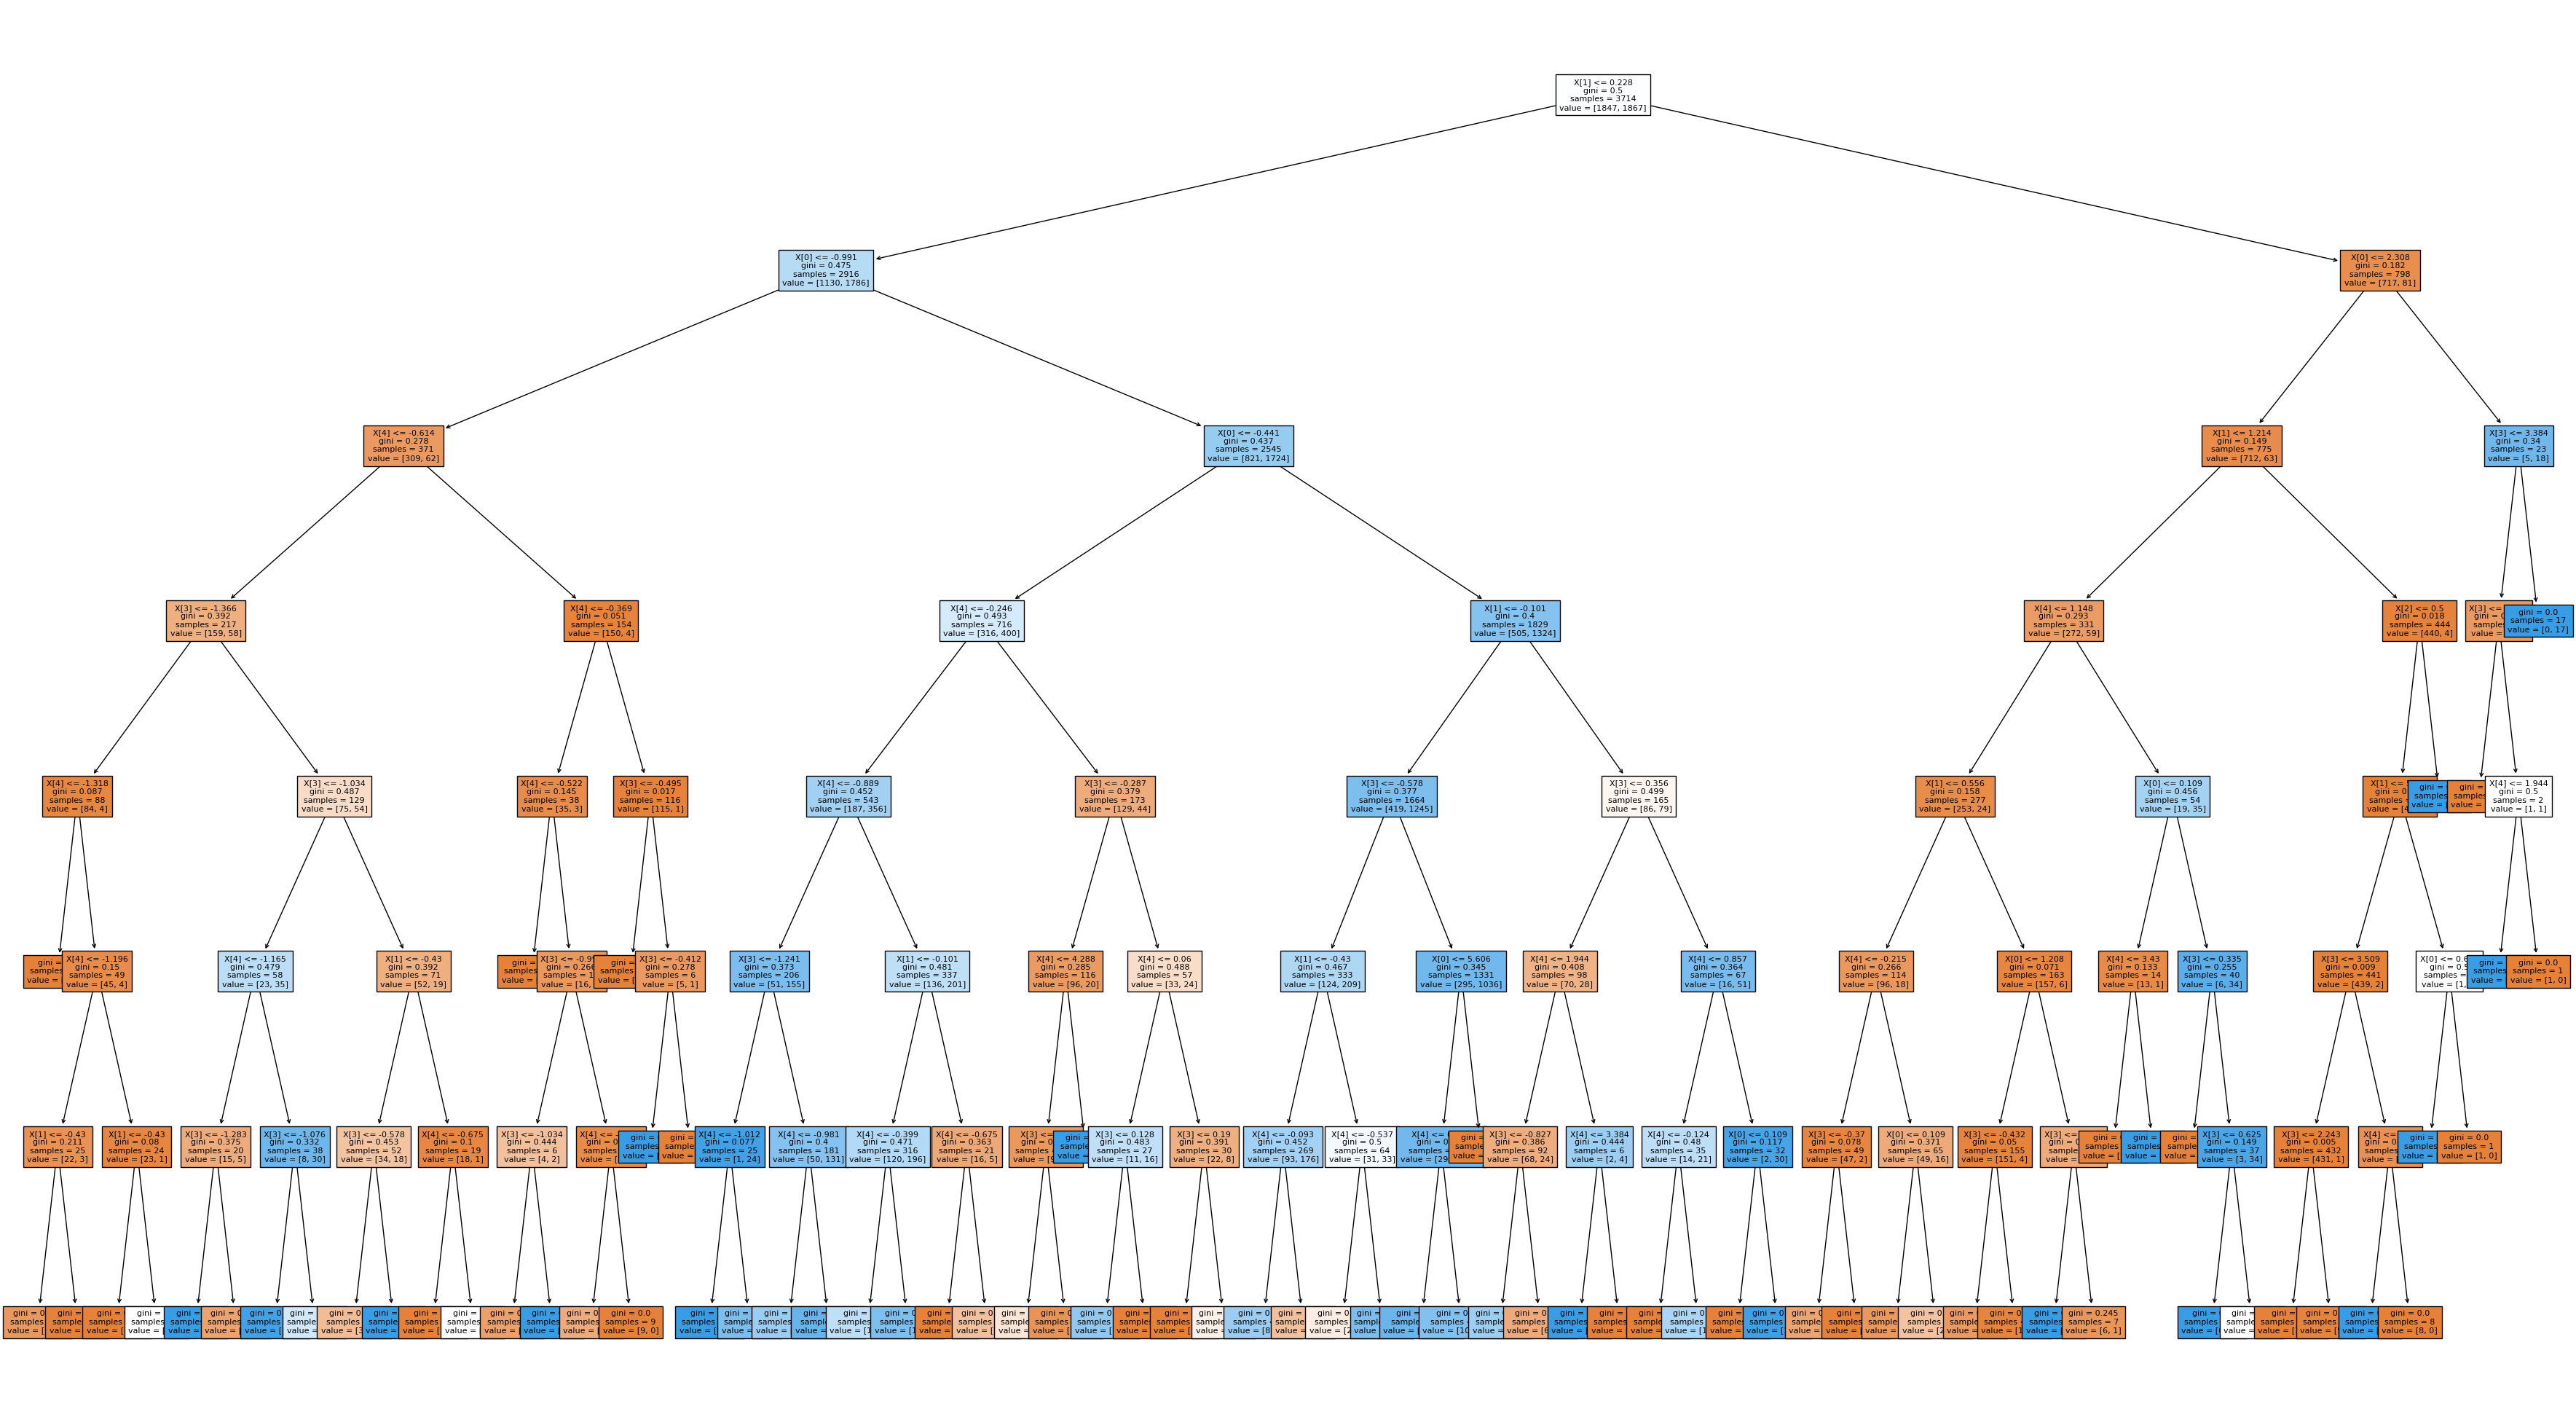

In [5]:
### investigate the relationship between the target and the features##

from sklearn.model_selection import train_test_split
from sklearn import tree

train, test = train_test_split(dfTrainV2, test_size=0.2, random_state=0)
 
clf = tree.DecisionTreeClassifier(max_depth=7)
#
Y_train=train[['CLASS_LABEL']]
X_train=train[['PathLevel_Standardized','NumDash_Standardized','TildeSymbol','PathLength_Standardized','UrlLength_Standardized']]

Y_test=test[['CLASS_LABEL']]
X_test=test[['PathLevel_Standardized','NumDash_Standardized','TildeSymbol','PathLength_Standardized','UrlLength_Standardized']]


plt.figure(figsize=(45,25))
tree.plot_tree(clf.fit(X_train, Y_train),filled=True,fontsize=8)
plt.show()


Plot ROC score to show the Recall against the false-positive rate for different threshold values. Closer the value is to 1, the more accurate.

[1. 1. 1. ... 1. 1. 1.]
0.7934201258356447


/Users/jprince/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


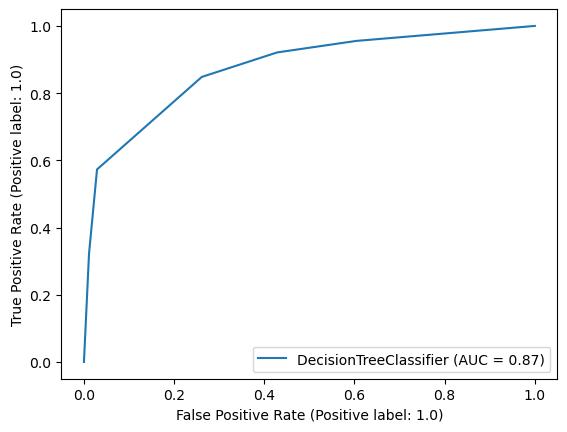

In [6]:
Y = dfClass_labels
X = dfTrain3
from sklearn.model_selection import train_test_split
from sklearn import tree
train, test = train_test_split(dfTrain3, test_size=0.2, random_state=0)
clf = tree.DecisionTreeClassifier(min_samples_split=0.3)
clf = clf.fit(X,Y)
Y_predicted = clf.predict(X)
print(Y_predicted)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
auc = roc_auc_score(Y,Y_predicted)
print(auc)
plot_roc_curve(clf, X, Y)


Good ROC score that denotes the model has a good recall score looking at the curve is close to 1.0

### Cluster Data using K-Means algorithm

First have to Identify best K-value using Silhouette method

[0.5075326504186908, 0.22990612401103924, 0.23659492648258476, 0.23153973170137027, 0.13111436975342153]


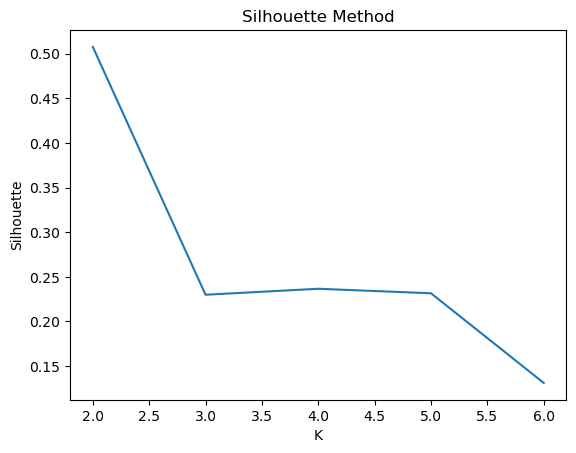

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil=[]
for k in range(2,7):
    clustermodel = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = clustermodel.fit_predict(dfTrain3)
    sil.append(silhouette_score(X, pred_y, metric = 'euclidean'))

plt.figure()
print(sil)

plt.plot(range(2, 7), sil)
plt.title('Silhouette Method')
plt.xlabel('K')
plt.ylabel('Silhouette')    
plt.show()

K=2 will provide best clusters

In [8]:
clustermodel = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)

Need to fit then plot the model using chosen Features

Features chosen for this plot are'UrlLength_Standardized' & 'NumDashInHostname_Standardized'

K-means clustering is not be best choice for as many features as are in the dataset. Another algorithm would be better suited for the amount of features in the dataset.

[[-1.51285756e-01 -1.15742174e-01 -5.95358888e-02  3.31637207e-03
   7.57563712e-03  1.19474409e-02  6.33953383e-03 -1.16548480e-01
  -6.88830045e-02 -1.96643318e-01 -1.84893806e-01 -5.29884457e-02
   1.73072420e-02  1.64367193e-02 -2.18202885e-01 -3.68160000e-02
   4.60935699e-04  1.29061996e-02  9.89859415e-01  5.23392487e-01
   9.21871399e-03  1.54413459e-02  4.26112007e-01  1.38280710e-03
   5.64646232e-02  4.08458340e-01  1.71468080e-01  8.49965430e-01
   2.58815395e-01  9.93316432e-02  1.56718138e-02  5.53122839e-03
   3.50772067e-01  3.41092418e-02  3.48006453e-02]
 [ 2.15930558e+00  1.65199110e+00  8.49757307e-01 -4.73346658e-02
  -1.08127268e-01 -1.70526138e-01 -9.04843333e-02  1.66349952e+00
   9.83168936e-01  2.80669525e+00  2.63899416e+00  7.56305480e-01
  -2.47026721e-01 -2.34601727e-01  3.11441552e+00  5.25475737e-01
   1.62630326e-19  1.64473684e-02  9.96710526e-01  3.68421053e-01
   1.01973684e-01  9.86842105e-03  3.65131579e-01 -6.50521303e-19
   3.94736842e-02  2.9257

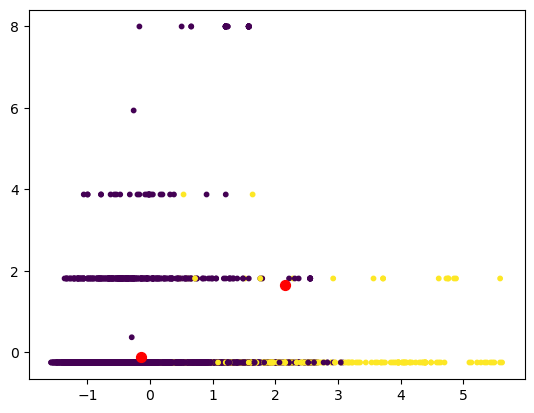

In [9]:
clustermodel.fit(dfTrain3)
centers=clustermodel.cluster_centers_
print(centers)
inertia=clustermodel.inertia_
print(inertia)

plt.figure()
pred_y = clustermodel.fit_predict(dfTrain3)
print(pred_y)

# Plot the clusters for 'UrlLength_Standardized' & 'NumDashInHostname_Standardized'
plt.scatter(dfTrain3['UrlLength_Standardized'],dfTrain3['NumDashInHostname_Standardized'], c= pred_y.astype(float), s=10)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.show()


Not very good clustering for the 2 parameters chosen for kmeans.

### K-fold cross validation

K-fold is used to validate the split between training and testing data. 

In [10]:
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=5, random_state=None, shuffle=False)
X=np.random.rand(10,2)
Y=np.random.rand(10,2)
for train_index, test_index in kf.split(X):
    print('train:', train_index, 'test:', test_index)
    X_train=X[train_index]
    X_test=X[test_index]
    Y_train=Y[train_index]
    Y_test=Y[test_index]
    print('train_x:', X_train, 'test_x:', X_test)
    print('train_y:', Y_train, 'test_y:', Y_test)

train: [2 3 4 5 6 7 8 9] test: [0 1]
train_x: [[0.15904452 0.31946576]
 [0.62507799 0.5982968 ]
 [0.87312143 0.0445773 ]
 [0.14036781 0.21576564]
 [0.79308507 0.98782191]
 [0.85046339 0.09119749]
 [0.92344824 0.37478514]
 [0.60713819 0.22241041]] test_x: [[0.39131116 0.27067023]
 [0.37023343 0.64552142]]
train_y: [[0.86082595 0.84547926]
 [0.0586239  0.12194371]
 [0.16132751 0.74248399]
 [0.52534522 0.16992055]
 [0.11385779 0.46197158]
 [0.85496855 0.97563909]
 [0.30920609 0.91168621]
 [0.70684269 0.57337214]] test_y: [[0.00952833 0.69956379]
 [0.21463342 0.30166861]]
train: [0 1 4 5 6 7 8 9] test: [2 3]
train_x: [[0.39131116 0.27067023]
 [0.37023343 0.64552142]
 [0.87312143 0.0445773 ]
 [0.14036781 0.21576564]
 [0.79308507 0.98782191]
 [0.85046339 0.09119749]
 [0.92344824 0.37478514]
 [0.60713819 0.22241041]] test_x: [[0.15904452 0.31946576]
 [0.62507799 0.5982968 ]]
train_y: [[0.00952833 0.69956379]
 [0.21463342 0.30166861]
 [0.16132751 0.74248399]
 [0.52534522 0.16992055]
 [0.113857

### Automate the process of model selection and parameter testing using grid search

The following grid search will score each combination of the parameters and print the score for each combination.

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier


min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
print(min_samples_splits)
 
#A dictionary data structure is used to indicate which parameters will be tuned and their values
tuned_parameters=[{'min_samples_split':min_samples_splits}] 


max_depth_params=[2,3,4,5,6,7,8,10,12,14,15,16,20]
base_model = DecisionTreeClassifier()
searched_parameters=[{'max_depth':[2,3,4,5,6,7,8,10,12,14],'min_sample_':[0.05,0.01,0.02]}]
s=['precision','recall','f1']

clf = GridSearchCV(estimator=base_model, param_grid=tuned_parameters,cv=10, verbose=3)

Y=dfClass_labels['CLASS_LABEL']
X=dfTrain2[['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash','NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore','NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash','NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress','DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname','HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath','NumSensitiveWords', 'EmbeddedBrandName', 'PctExtResourceUrls','ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction','AbnormalFormAction', 'RightClickDisabled', 'PopUpWindow','IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm']]

clf.fit(X,Y)

scores = ['precision', 'recall', 'f1']
 
clf = GridSearchCV(base_model, tuned_parameters,cv=5,scoring=scores, refit='f1', verbose=3)
 
clf.fit(X,Y)
 
#print(clf.cv_results_)
print('Mean F1: ',clf.cv_results_['mean_test_f1'])
print('Mean Recall: ',clf.cv_results_['mean_test_recall'])
print('Mean Precision: ',clf.cv_results_['mean_test_precision'])



[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ............min_samples_split=0.1;, score=0.880 total time=   0.0s
[CV 2/10] END ............min_samples_split=0.1;, score=0.877 total time=   0.0s
[CV 3/10] END ............min_samples_split=0.1;, score=0.875 total time=   0.0s
[CV 4/10] END ............min_samples_split=0.1;, score=0.894 total time=   0.0s
[CV 5/10] END ............min_samples_split=0.1;, score=0.856 total time=   0.0s
[CV 6/10] END ............min_samples_split=0.1;, score=0.847 total time=   0.0s
[CV 7/10] END ............min_samples_split=0.1;, score=0.845 total time=   0.0s
[CV 8/10] END ............min_samples_split=0.1;, score=0.869 total time=   0.0s
[CV 9/10] END ............min_samples_split=0.1;, score=0.866 total time=   0.0s
[CV 10/10] END ...........min_samples_split=0.1;, score=0.871 total time=   0.0s
[CV 1/10] END ............min_samples_split=0.2;, score=0.849 total time=   0.0s
[CV 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END min_samples_split=0.1; f1: (test=0.865) precision: (test=0.846) recall: (test=0.884) total time=   0.0s
[CV 2/5] END min_samples_split=0.1; f1: (test=0.883) precision: (test=0.876) recall: (test=0.891) total time=   0.0s
[CV 3/5] END min_samples_split=0.1; f1: (test=0.860) precision: (test=0.845) recall: (test=0.876) total time=   0.0s
[CV 4/5] END min_samples_split=0.1; f1: (test=0.853) precision: (test=0.849) recall: (test=0.856) total time=   0.0s
[CV 5/5] END min_samples_split=0.1; f1: (test=0.719) precision: (test=0.636) recall: (test=0.828) total time=   0.0s
[CV 1/5] END min_samples_split=0.2; f1: (test=0.819) precision: (test=0.889) recall: (test=0.760) total time=   0.0s
[CV 2/5] END min_samples_split=0.2; f1: (test=0.827) precision: (test=0.917) recall: (test=0.754) total time=   0.0s
[CV 3/5] END min_samples_split=0.2; f1: (test=0.800) precision: (test=0.922) recall: (test=0.707) total time=   0.0s
[CV

 Results of the Grid Search show mean f1, mean recall and mean precision.

#### Plot metric scores to pick best parameters. Mean F1 scores to find best min_samples_splits for model. 

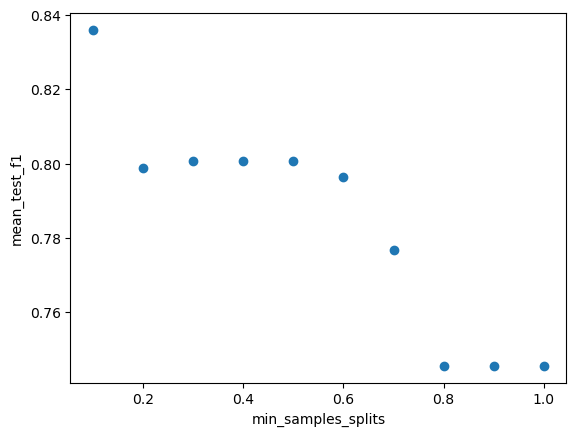

In [12]:
plt.figure()
plt.scatter(x=min_samples_splits,y=clf.cv_results_['mean_test_f1'])
plt.ylabel('mean_test_f1')
plt.xlabel('min_samples_splits')
plt.show()

Plot shows that best parameter is min_sample_splits to be .1, which has the highest F1 score for the 10 splits. 

#### Fit the final model using .1 for min_samples_splits

In [13]:
finalmodel = DecisionTreeClassifier(max_depth=10,min_samples_split=0.01)
finalmodel.fit(X,Y)

print(finalmodel.n_features_in_)
print(finalmodel.n_outputs_)
print(finalmodel.score)

38
1
<bound method ClassifierMixin.score of DecisionTreeClassifier(max_depth=10, min_samples_split=0.01)>


The model that contains 38 features should have a max tree depth of 10. 